In [1]:
# importando as bibliotecas que trabalharemos hoje 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# abrindo csv
peipei = pd.read_csv('peipei.csv', parse_dates = True)

In [3]:
# checando se importamos o csv corretamente
peipei.head()

,dia,dia_semana,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,promo
0,2017-01-02,segunda-feira,1104974,11065645.39,1099023,11014878.64,0,0.0,2005901,Mídia Social
1,2017-01-03,terça-feira,1685145,16856934.69,1683543,16823210.64,0,0.0,3070587,Rádio
2,2017-01-04,quarta-feira,1043365,10421214.51,1046332,10498524.01,0,0.0,1901879,Mídia Social
3,2017-01-05,quinta-feira,1052221,10486631.45,1056090,10563090.65,0,0.0,2101866,NaN
4,2017-01-06,sexta-feira,926018,9275655.83,924027,9271700.51,0,0.0,1684770,Mídia Social


In [4]:
peipei.tail()

,dia,dia_semana,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,promo
725,2018-12-28,sexta-feira,2138581,21461771.61,2151555,21542020.19,1609052,48141810.47,5360004,NaN
726,2018-12-29,sábado,1854058,18584702.90,1860467,18541150.49,1388730,41723227.00,4649793,NaN
727,2018-12-30,domingo,1490585,14885272.82,1490591,14951793.89,1116548,33439563.36,3723071,Mídia Social
728,2018-12-31,segunda-feira,2850053,28567984.12,2852631,28451644.95,2136237,63785036.00,7108372,Rádio
729,2019-01-01,terça-feira,2282150,22707823.51,2290961,23014377.72,1723456,51571655.42,5729314,Mídia Social


In [5]:
peipei = peipei.drop([729])

In [6]:
#conhecendo o tipo de dados que temos
peipei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 728
Data columns (total 10 columns):
dia             729 non-null object
dia_semana      729 non-null object
p2p             729 non-null int64
vol_tran_p2p    729 non-null float64
p2b             729 non-null int64
vol_tran_p2b    729 non-null float64
p2d             729 non-null int64
vol_tran_p2d    729 non-null float64
num_user        729 non-null int64
promo           573 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 62.6+ KB


### **Variáveis** ###
* dia - data em que ocorreu a transação (variável categórica ordinal)
* dia_semana - dia da semana em que ocorreu a transação (variável categórica ordinal)
* p2p - número de transação de pagamento entre pessoas físicas - (variável numérica discreta)
* vol_tran_p2p - valor total transacionado entre pessoas físicas - (varável númerica contínua)
* p2b - número de transações entre pessoas físicas e negócios - (variável numérica discreta)
* vol_tran_p2b - valor total transacionado  entre pessoas físicas e negócio - (variável numérica contínua)
* p2d - número de transações ocorrdas em serviços digitais - (variável numérica discreta)
* vol_tran_p2d - valor total transacionado em serviços digitais - (variável numérica contínua)
* num_user - número do usuário (variável numérica)
* promo - tipode propaganda ocorrida no dia (variável categórica nominal)

1. ***Observações*** 

Período dos dados= 2 anos

a. O conjunto de dados é composto por 10 variáveis (colunas). </p>
b. Apenas a coluna promo possui dados faltantes (NaN). Para este conjunto de dados a falta de informações faz sentido, por que pode não ter ocorrido promoções em determinadas datas. Temos 730 dias nos quais 156 dias não tiveram promoção(divulgação) do produto

In [7]:
# preenchendo NaN com s/promo
peipei.promo.fillna('s/ promo', inplace = True)

In [8]:
#ajusta as notações científicas para float
pd.set_option('display.float_format', '{:.2f}'.format)

In [9]:
#criando um df 'corrido'

dfp2p = peipei[['dia','dia_semana', 'p2p', 'vol_tran_p2p']]
dfp2b = peipei[['dia','dia_semana', 'p2b', 'vol_tran_p2b']]
dfp2d = peipei[['dia','dia_semana', 'p2d', 'vol_tran_p2d']]

dfp2p['tipo'] = 'p2p'
dfp2b['tipo'] = 'p2b'
dfp2d['tipo'] = 'p2d'

dfp2p.columns = ['dia','dia_semana', 'qtde_tran','volume','tipo']
dfp2b.columns = ['dia','dia_semana', 'qtde_tran','volume','tipo']
dfp2d.columns = ['dia','dia_semana', 'qtde_tran','volume','tipo']

df = pd.concat([dfp2p,dfp2b,dfp2d])
df.tail()


,dia,dia_semana,qtde_tran,volume,tipo
724,2018-12-27,quinta-feira,1769620,53162442.34,p2d
725,2018-12-28,sexta-feira,1609052,48141810.47,p2d
726,2018-12-29,sábado,1388730,41723227.00,p2d
727,2018-12-30,domingo,1116548,33439563.36,p2d
728,2018-12-31,segunda-feira,2136237,63785036.00,p2d


## 1.Totais##

In [10]:
#Total de usários 
total_user = peipei.num_user.sum()
print('Usuarios',total_user)

#Total de Transações
total_trans = (peipei.p2p.sum())+ (peipei.p2b.sum())+ (peipei.p2d.sum())
print('Transações', total_trans)

#Total Volume Transacionado
total_vol = (peipei.vol_tran_p2p.sum())+(peipei.vol_tran_p2b.sum()) + (peipei.vol_tran_p2d.sum())
print('Volume', total_vol)

Usuarios 2650549753
Transações 2881828988
Volume 40921771136.86


In [11]:
# Totais
total_p2p = peipei.p2p.sum()
print('Total de transações p2p', total_p2p)
total_vol_p2p = peipei.vol_tran_p2p.sum()
print('Volume (R$) total de transações p2p', total_vol_p2p)
total_p2b = peipei.p2b.sum()
print('Total de transações p2b', total_p2b)
total_vol_p2b = peipei.vol_tran_p2b.sum()
print('Volume (R$) total de transações p2b', total_vol_p2b)
total_p2d = peipei.p2d.sum()
print('Total de transações p2d', total_p2d)
total_vol_p2d = peipei.vol_tran_p2d.sum()
print('Volume (R$) total de transações p2d', total_vol_p2d)

Total de transações p2p 1138194499
Volume (R$) total de transações p2p 11381661614.59
Total de transações p2b 1138217241
Volume (R$) total de transações p2b 11381332559.599998
Total de transações p2d 605417248
Volume (R$) total de transações p2d 18158776962.67


In [12]:
print('O volume total de transações p2d representa', round((100*total_vol_p2d)/total_vol),
      'por cento das transações')

O volume total de transações p2d representa 44.0 por cento das transações


In [13]:
pizza = pd.DataFrame([total_vol_p2p, total_vol_p2b,total_vol_p2d], index=['p2p', 'p2b', 'p2d'], columns=['totais'])
pizza['%']=pizza['totais']/total_vol
pizza.head()

,totais,%
p2p,11381661614.59,0.28
p2b,11381332559.60,0.28
p2d,18158776962.67,0.44


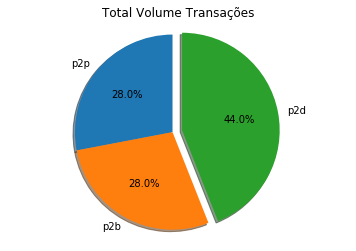

In [14]:
label ='p2p', 'p2b','p2d'
size = [28,28,44]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
plt.title('Total Volume Transações')
ax1.pie(size, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');

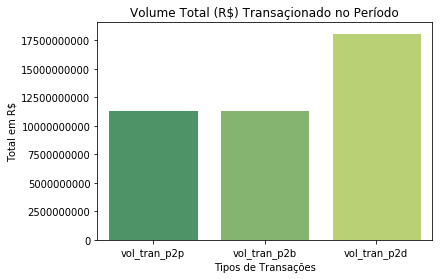

In [15]:
#plotando os totais no período
features = ['vol_tran_p2p','vol_tran_p2b','vol_tran_p2d']
valor = [peipei.vol_tran_p2p.sum(),peipei.vol_tran_p2b.sum(), peipei.vol_tran_p2d.sum()]
plt.title('Volume Total (R$) Transaçionado no Período')
plt.xlabel("Tipos de Transações")
plt.ylabel("Total em R$")
plt.ticklabel_format( axis = 'y', style ='plain')
sns.set(style="darkgrid")
sns.barplot(x=features, y=valor,palette='summer');

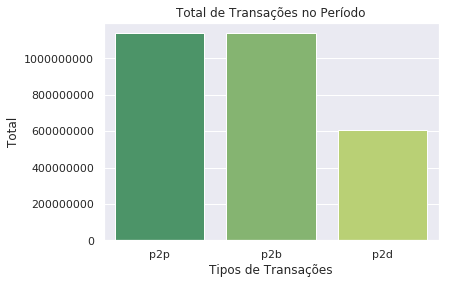

In [16]:
#plotando os totais de transações
features = ['p2p','p2b','p2d']
valor = [peipei.p2p.sum(),peipei.p2b.sum(), peipei.p2d.sum()]
plt.title('Total de Transações no Período')
plt.xlabel("Tipos de Transações")
plt.ylabel("Total")
plt.ticklabel_format( axis = 'y', style ='plain')
sns.set(style="darkgrid")
sns.barplot(x=features, y=valor,palette='summer');

 ***Por promoções*** 

In [17]:
#total propagandas
peipei.promo.value_counts() 

Mídia Social    405
s/ promo        156
Rádio           118
TV               50
Name: promo, dtype: int64

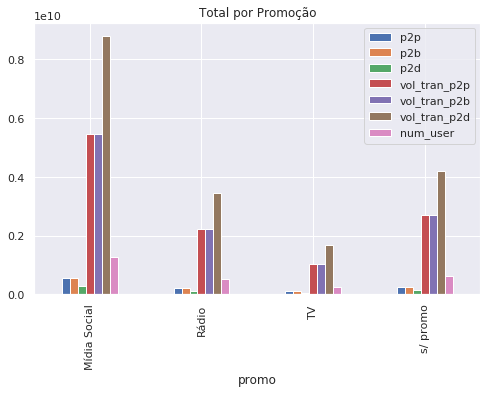

In [18]:
#totais por promoção
peipei.groupby('promo')['p2p','p2b','p2d','vol_tran_p2p','vol_tran_p2b',
                           'vol_tran_p2d','num_user'].sum().plot(kind = 'bar', figsize = (8,5),
                                                                title = ('Total por Promoção'));

In [19]:
peipei.groupby('promo')['p2p','p2b','p2d','vol_tran_p2p','vol_tran_p2b',
                           'vol_tran_p2d','num_user'].sum()

,p2p,p2b,p2d,vol_tran_p2p,vol_tran_p2b,vol_tran_p2d,num_user
promo,,,,,,,
Mídia Social,545185043,545227948,293863686,5451746911.70,5452247354.32,8814108723.59,1273433290
Rádio,221510211,221579505,115497066,2216311247.96,2215574956.40,3466124348.06,514649754
TV,102037507,102026486,56416482,1020281239.16,1019334110.05,1692063335.46,238702544
s/ promo,269461738,269383302,139640014,2693322215.77,2694176138.83,4186480555.56,623764165


## 2.Ticket Médio##

In [20]:
#criando um dataset com os tickets médios 
peipei_tickets = peipei.copy()
#criando as colunas
peipei_tickets['ticket_p2p'] = peipei_tickets.vol_tran_p2p/peipei_tickets.p2p
peipei_tickets['ticket_p2b'] = peipei_tickets.vol_tran_p2b/peipei_tickets.p2b
peipei_tickets['ticket_p2d'] = peipei_tickets.vol_tran_p2d/peipei_tickets.p2d
peipei_tickets['ticket_p2d'].fillna(0,inplace=True)
peipei_tickets.head()

,dia,dia_semana,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,promo,ticket_p2p,ticket_p2b,ticket_p2d
0,2017-01-02,segunda-feira,1104974,11065645.39,1099023,11014878.64,0,0.00,2005901,Mídia Social,10.01,10.02,0.00
1,2017-01-03,terça-feira,1685145,16856934.69,1683543,16823210.64,0,0.00,3070587,Rádio,10.00,9.99,0.00
2,2017-01-04,quarta-feira,1043365,10421214.51,1046332,10498524.01,0,0.00,1901879,Mídia Social,9.99,10.03,0.00
3,2017-01-05,quinta-feira,1052221,10486631.45,1056090,10563090.65,0,0.00,2101866,s/ promo,9.97,10.00,0.00
4,2017-01-06,sexta-feira,926018,9275655.83,924027,9271700.51,0,0.00,1684770,Mídia Social,10.02,10.03,0.00


1. Ticket Médio em todo o periodo (2 anos)

In [21]:
#ticket médio de todo o período
ticket_mediop2p = peipei_tickets.ticket_p2p.mean()
print('O ticket médio p2p no péríodo é de:', ticket_mediop2p)
ticket_mediop2p = peipei_tickets.ticket_p2p.mean()
print('O ticket médio p2b no péríodo é de:', ticket_mediop2p)
ticket_mediop2d = peipei_tickets.ticket_p2d.mean()
print('O ticket médio p2d no péríodo é de:', ticket_mediop2d)

O ticket médio p2p no péríodo é de: 9.99999552133739
O ticket médio p2b no péríodo é de: 9.99999552133739
O ticket médio p2d no péríodo é de: 19.749814537585188


In [22]:
#media de usuário por dia ao longo do período
round(peipei_tickets['num_user'].mean())

3635871

***Propaganda***

In [23]:
peipei_tickets.groupby('promo')[['ticket_p2p','ticket_p2b','ticket_p2d']].mean()

,ticket_p2p,ticket_p2b,ticket_p2d
promo,,,
Mídia Social,10.00,10.00,19.85
Rádio,10.00,10.00,19.08
TV,10.00,9.99,21.00
s/ promo,10.00,10.00,19.60


Nota-se que quando veiculado na TV o valor do ticket médio p2d aumenta, ocorre o contrário com o ticket médio p2b que diminui um centavo.

2. Ticket Médio por ano

In [24]:
#criando um dataframe index tempo para filtrar
anual_peipei= peipei_tickets.copy()
anual_peipei.index = anual_peipei.dia
del anual_peipei['dia'] #coluna duplicada, apago
anual_peipei.index = pd.to_datetime(anual_peipei.index)
anual_peipei.head()

,dia_semana,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,promo,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,,,
2017-01-02,segunda-feira,1104974,11065645.39,1099023,11014878.64,0,0.00,2005901,Mídia Social,10.01,10.02,0.00
2017-01-03,terça-feira,1685145,16856934.69,1683543,16823210.64,0,0.00,3070587,Rádio,10.00,9.99,0.00
2017-01-04,quarta-feira,1043365,10421214.51,1046332,10498524.01,0,0.00,1901879,Mídia Social,9.99,10.03,0.00
2017-01-05,quinta-feira,1052221,10486631.45,1056090,10563090.65,0,0.00,2101866,s/ promo,9.97,10.00,0.00
2017-01-06,sexta-feira,926018,9275655.83,924027,9271700.51,0,0.00,1684770,Mídia Social,10.02,10.03,0.00


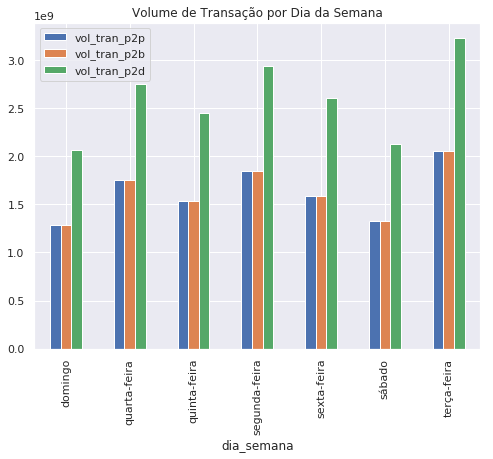

In [25]:
peipei.groupby('dia_semana')[['vol_tran_p2p','vol_tran_p2b','vol_tran_p2d']].sum().plot(
    kind = 'bar',figsize = (8,6), title = ('Volume de Transação por Dia da Semana'));

### ***2017*** ###

In [26]:
#2017
peipei_2017 = anual_peipei.loc['2017-01-01':'2017-12-31']
peipei_2017.head()

,dia_semana,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,promo,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,,,
2017-01-02,segunda-feira,1104974,11065645.39,1099023,11014878.64,0,0.00,2005901,Mídia Social,10.01,10.02,0.00
2017-01-03,terça-feira,1685145,16856934.69,1683543,16823210.64,0,0.00,3070587,Rádio,10.00,9.99,0.00
2017-01-04,quarta-feira,1043365,10421214.51,1046332,10498524.01,0,0.00,1901879,Mídia Social,9.99,10.03,0.00
2017-01-05,quinta-feira,1052221,10486631.45,1056090,10563090.65,0,0.00,2101866,s/ promo,9.97,10.00,0.00
2017-01-06,sexta-feira,926018,9275655.83,924027,9271700.51,0,0.00,1684770,Mídia Social,10.02,10.03,0.00


In [27]:
peipei_2017.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2017-01-02 to 2017-12-31
Data columns (total 12 columns):
dia_semana      364 non-null object
p2p             364 non-null int64
vol_tran_p2p    364 non-null float64
p2b             364 non-null int64
vol_tran_p2b    364 non-null float64
p2d             364 non-null int64
vol_tran_p2d    364 non-null float64
num_user        364 non-null int64
promo           364 non-null object
ticket_p2p      364 non-null float64
ticket_p2b      364 non-null float64
ticket_p2d      364 non-null float64
dtypes: float64(6), int64(4), object(2)
memory usage: 37.0+ KB


In [28]:
#estatísca descritiva distriuição 2017
peipei_2017.describe()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
count,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00
mean,1337305.33,13373849.17,1337432.85,13372202.09,321273.91,9638328.46,2807670.51,10.00,10.00,9.48
std,352800.09,3525857.98,352883.07,3527047.71,497986.40,14938521.68,846554.28,0.03,0.03,13.97
min,734652.00,7322289.50,734779.00,7363339.58,0.00,0.00,1462904.00,9.95,9.95,0.00
25%,1067325.25,10673481.51,1067538.75,10643292.81,0.00,0.00,2187417.50,9.98,9.97,0.00
50%,1290304.00,12890887.16,1285467.00,12888303.84,0.00,0.00,2657744.50,10.00,10.00,0.00
75%,1537999.50,15369163.13,1537733.00,15364187.51,794580.25,23787961.00,3347782.50,10.02,10.02,29.92
max,3427566.00,34125741.79,3435034.00,34372223.68,2582596.00,77362208.35,8568123.00,10.05,10.05,30.15


In [29]:
print('O total de transações p2p em 2017 é de:', peipei_2017['p2p'].sum())
print('O total de transações p2b em 2017 é de:',peipei_2017['p2b'].sum())
print('O total de transações p2d em 2017 é de:',peipei_2017['p2d'].sum())


O total de transações p2p em 2017 é de: 486779141
O total de transações p2b em 2017 é de: 486825556
O total de transações p2d em 2017 é de: 116943705


In [30]:
total_transacoes_2017 = peipei_2017['p2p'].sum() + peipei_2017['p2b'].sum()+ peipei_2017['p2d'].sum()
print(total_transacoes_2017)

1090548402


In [31]:
print('A % p2p em 2017 é de:', peipei_2017['p2p'].sum() / total_transacoes_2017)
print('A % p2b em 2017 é de:',peipei_2017['p2b'].sum() / total_transacoes_2017)
print('A % p2d em 2017 é de:',peipei_2017['p2d'].sum()/total_transacoes_2017)

A % p2p em 2017 é de: 0.4463617938527776
A % p2b em 2017 é de: 0.44640435500816955
A % p2d em 2017 é de: 0.10723385113905289


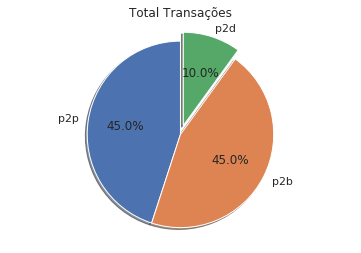

In [32]:
#gráfico total transações 2017
label ='p2p', 'p2b','p2d'
size = [45,45,10]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
plt.title('Total Transações')
ax1.pie(size, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');

In [33]:
print('O volume (R$) p2p em 2017 é de:', peipei_2017['vol_tran_p2p'].sum())
print('volume (R$) p2b em 2017 é de:',peipei_2017['vol_tran_p2b'].sum())
print('volume (R$) p2d em 2017 é de:',peipei_2017['vol_tran_p2d'].sum())

O volume (R$) p2p em 2017 é de: 4868081096.190001
volume (R$) p2b em 2017 é de: 4867481561.53
volume (R$) p2d em 2017 é de: 3508351558.8199997


In [34]:
total_volume_2017 = peipei_2017['vol_tran_p2p'].sum() + peipei_2017['vol_tran_p2b'].sum()+ peipei_2017['vol_tran_p2d'].sum()
print(total_volume_2017)

13243914216.54


In [35]:
print('A % p2p em 2017 é de:', peipei_2017['vol_tran_p2p'].sum() / total_volume_2017)
print('A % p2b em 2017 é de:',peipei_2017['vol_tran_p2b'].sum() / total_volume_2017)
print('A % p2d em 2017 é de:',peipei_2017['vol_tran_p2d'].sum() / total_volume_2017)

A % p2p em 2017 é de: 0.3675711739442085
A % p2b em 2017 é de: 0.36752590525323103
A % p2d em 2017 é de: 0.2649029208025604


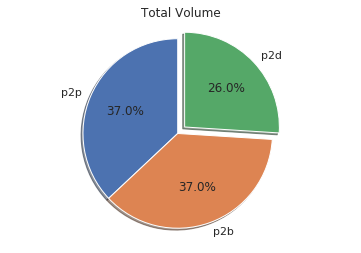

In [36]:
#gráfico volume (R$) 2017
label ='p2p', 'p2b','p2d'
size = [37,37,26]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
plt.title('Total Volume')
ax1.pie(size, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');

In [37]:
#criando dataset com todos as médias do ano de 2017
media_2017 = anual_peipei.resample('M').mean()
media_2017 = media_2017.reset_index()
media_2017 = media_2017.loc[0:11]
media_2017['total_transacao'] = media_2017.p2p+ media_2017.p2d + media_2017.p2d
media_2017['total_volume'] = media_2017.vol_tran_p2p+ media_2017.vol_tran_p2b + media_2017.vol_tran_p2d
media_2017.head(20)

,dia,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d,total_transacao,total_volume
0,2017-01-31,1106254.13,11069867.90,1104776.53,11042921.90,0.00,0.00,2090148.33,10.01,10.00,0.00,1106254.13,22112789.80
1,2017-02-28,1148122.64,11483788.55,1148565.04,11485445.65,0.00,0.00,2177131.79,10.00,10.00,0.00,1148122.64,22969234.20
2,2017-03-31,1250851.42,12523770.17,1250717.48,12494223.16,0.00,0.00,2401099.90,10.01,9.99,0.00,1250851.42,25017993.33
3,2017-04-30,1262443.50,12624589.08,1263131.20,12634539.84,0.00,0.00,2380380.00,10.00,10.00,0.00,1262443.50,25259128.92
4,2017-05-31,1396918.06,13973765.94,1397570.84,13982970.62,0.00,0.00,2682426.00,10.00,10.01,0.00,1396918.06,27956736.57
5,2017-06-30,1397335.07,13970078.35,1398638.63,13994372.55,0.00,0.00,2650003.70,10.00,10.01,0.00,1397335.07,27964450.90
6,2017-07-31,1448924.55,14485303.55,1449499.61,14496109.75,0.00,0.00,2772451.42,10.00,10.00,0.00,1448924.55,28981413.29
7,2017-08-31,1508194.55,15080833.37,1508107.71,15086632.18,0.00,0.00,2943660.00,10.00,10.00,0.00,1508194.55,30167465.54
8,2017-09-30,1317051.23,13169440.92,1316245.87,13154553.49,689140.33,20676079.29,3053965.30,10.00,9.99,23.00,2695331.90,47000073.70
9,2017-10-31,1346304.68,13473148.76,1347641.90,13469491.33,1009866.29,30312791.65,3366741.90,10.01,9.99,30.01,3366037.26,57255431.73


In [38]:
#substituindo dia por mês
mes = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
media_2017['dia'] = mes
media_2017.columns=(['mes','p2p','vol_tran_p2p','p2b','vol_tran_p2b','p2d','vol_tran_p2d','num_user','ticket_p2p','ticket_p2b',
                     'ticket_p2d','total_transacao','total_volume'])
media_2017.head(12)

,mes,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d,total_transacao,total_volume
0,jan,1106254.13,11069867.90,1104776.53,11042921.90,0.00,0.00,2090148.33,10.01,10.00,0.00,1106254.13,22112789.80
1,fev,1148122.64,11483788.55,1148565.04,11485445.65,0.00,0.00,2177131.79,10.00,10.00,0.00,1148122.64,22969234.20
2,mar,1250851.42,12523770.17,1250717.48,12494223.16,0.00,0.00,2401099.90,10.01,9.99,0.00,1250851.42,25017993.33
3,abr,1262443.50,12624589.08,1263131.20,12634539.84,0.00,0.00,2380380.00,10.00,10.00,0.00,1262443.50,25259128.92
4,mai,1396918.06,13973765.94,1397570.84,13982970.62,0.00,0.00,2682426.00,10.00,10.01,0.00,1396918.06,27956736.57
5,jun,1397335.07,13970078.35,1398638.63,13994372.55,0.00,0.00,2650003.70,10.00,10.01,0.00,1397335.07,27964450.90
6,jul,1448924.55,14485303.55,1449499.61,14496109.75,0.00,0.00,2772451.42,10.00,10.00,0.00,1448924.55,28981413.29
7,ago,1508194.55,15080833.37,1508107.71,15086632.18,0.00,0.00,2943660.00,10.00,10.00,0.00,1508194.55,30167465.54
8,set,1317051.23,13169440.92,1316245.87,13154553.49,689140.33,20676079.29,3053965.30,10.00,9.99,23.00,2695331.90,47000073.70
9,out,1346304.68,13473148.76,1347641.90,13469491.33,1009866.29,30312791.65,3366741.90,10.01,9.99,30.01,3366037.26,57255431.73


In [39]:
soma_2017 = anual_peipei.resample('M').sum()
soma_2017 = soma_2017.reset_index()
soma_2017 = soma_2017.loc[0:11]
soma_2017['dia'] = mes
soma_2017.tail()

,dia,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
7,ago,46754031,467505834.34,46751339,467685597.46,0,0.00,91253460,309.93,310.10,0.00
8,set,39511537,395083227.54,39487376,394636604.69,20674210,620282378.75,91618959,299.98,299.85,689.92
9,out,41735445,417667611.50,41776899,417554231.13,31305855,939696541.05,104368999,310.23,309.82,930.46
10,nov,43525382,434880725.60,43461114,434590158.97,32607373,978598218.65,108726483,299.81,299.96,900.45
11,dez,43126816,430993528.39,43161190,431095053.00,32356267,969774420.37,107913216,309.84,309.65,929.26


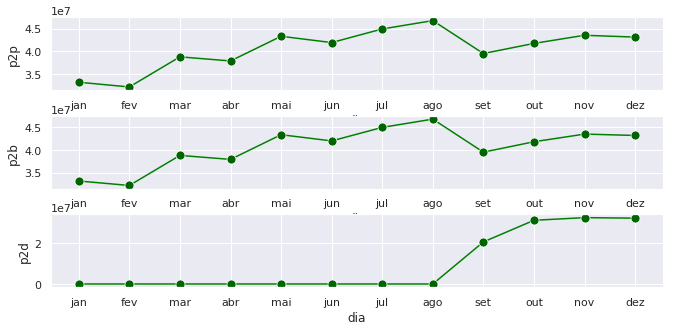

In [40]:
dados0 = ['p2p','p2p','p2b', 'p2d']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

for col, ax in zip(dados0[1:], axs.ravel()):
    sns.lineplot(x='dia',y=col,data=soma_2017, ax=ax, marker = 'o',   markerfacecolor='darkgreen', 
             markersize=9 ,sort = False, color = 'green')
    plt.subplots_adjust(top=0.95, bottom=0.2, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3);

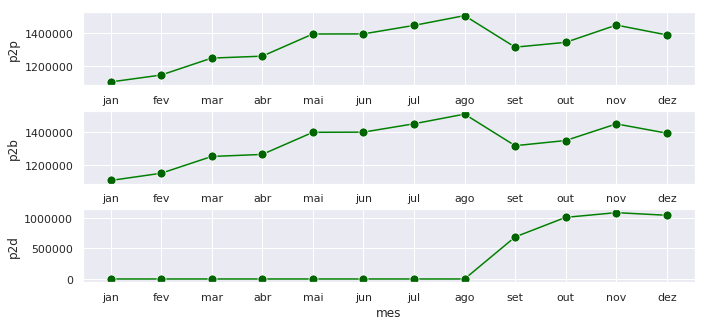

In [41]:
#Evolução da média de transação
dados1 = ['p2p','p2p','p2b', 'p2d']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

for col, ax in zip(dados1[1:], axs.ravel()):
    sns.lineplot(x='mes',y=col,data=media_2017, ax=ax, marker = 'o',   markerfacecolor='darkgreen', 
             markersize=9 ,sort = False, color = 'green')
    plt.subplots_adjust(top=0.95, bottom=0.2, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3);

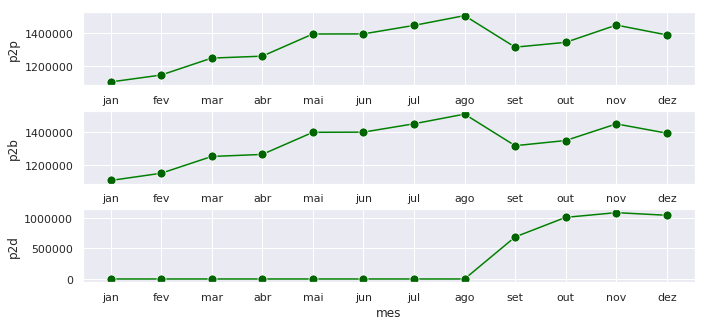

In [42]:
#Evolução média volume
dados2 = ['vol_tran_p2p','vol_tran_p2p','vol_tran_p2d','vol_tran_p2d']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

for col, ax in zip(dados1[1:], axs.ravel()):
    sns.lineplot(x='mes',y=col,data=media_2017, ax=ax, marker = 'o',   markerfacecolor='darkgreen', 
             markersize=9 ,sort = False, color = 'green')
    plt.subplots_adjust(top=0.95, bottom=0.2, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3);

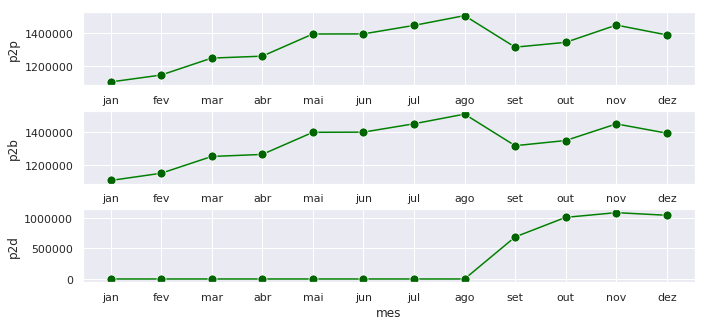

In [43]:
#Evolução ticket médio
dados2 = ['ticket_p2p','ticket_p2p','ticket_p2b','ticket_p2d']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

for col, ax in zip(dados1[1:], axs.ravel()):
    sns.lineplot(x='mes',y=col,data=media_2017, ax=ax, marker = 'o',   markerfacecolor='darkgreen', 
             markersize=9 ,sort = False, color = 'green')
    plt.subplots_adjust(top=0.95, bottom=0.2, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3);

In [44]:
print('Ticket Médio p2p',peipei_2017.ticket_p2p.mean())
print('Ticket Médio p2b',peipei_2017.ticket_p2b.mean())
print('Ticket Médio p2d',peipei_2017.ticket_p2d.mean())

Ticket Médio p2p 10.000978282610644
Ticket Médio p2b 9.9986995447518
Ticket Médio p2d 9.478266835606181


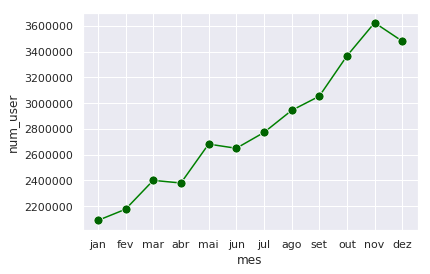

In [45]:
#Evolução média de usuários por mês
sns.lineplot(x='mes',y='num_user',data=media_2017, marker = 'o',   markerfacecolor='darkgreen', markersize=9 ,sort = False, color = 'green');

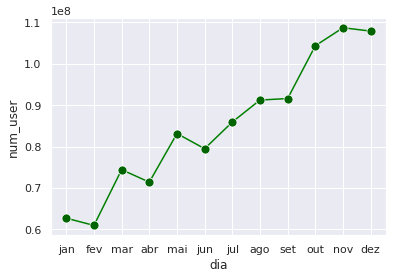

In [46]:
#Evolução média de usuários por mês
sns.lineplot(x='dia',y='num_user',data=soma_2017, marker = 'o',   markerfacecolor='darkgreen', markersize=9 ,sort = False, color = 'green');

In [47]:
print(peipei_2017['num_user'].min(), peipei_2017['num_user'].max())

1462904 8568123


In [48]:
#variabilidade ao longo dos meses
peipei_2017.resample('M').std()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,
2017-01-31,263895.52,2641321.45,263856.61,2630967.85,0.00,0.00,506460.79,0.02,0.03,0.00
2017-02-28,223852.15,2230167.65,222702.00,2227130.82,0.00,0.00,429899.12,0.03,0.03,0.00
2017-03-31,364994.87,3656593.13,362328.80,3618253.49,0.00,0.00,654740.71,0.03,0.03,0.00
2017-04-30,268769.89,2687834.63,269380.71,2692986.72,0.00,0.00,520003.52,0.03,0.03,0.00
2017-05-31,329962.75,3312228.24,331143.33,3305925.92,0.00,0.00,659747.61,0.03,0.03,0.00
2017-06-30,329547.08,3287470.60,330298.81,3292396.64,0.00,0.00,591911.10,0.03,0.03,0.00
2017-07-31,361833.28,3623802.23,362117.65,3610901.29,0.00,0.00,630723.88,0.03,0.03,0.00
2017-08-31,352170.53,3536033.83,352914.08,3534971.80,0.00,0.00,659233.66,0.03,0.03,0.00
2017-09-30,341488.34,3415535.56,341864.69,3412409.47,416938.48,12519756.42,626201.90,0.03,0.03,12.90


***Promoção***

In [49]:
#média de volume de transação por tipo de promoção
peipei_2017.groupby('promo')['vol_tran_p2p','vol_tran_p2d','vol_tran_p2d','num_user','ticket_p2p','ticket_p2b',
                             'ticket_p2d','num_user'].mean()

,vol_tran_p2p,vol_tran_p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d,num_user
promo,,,,,,,,
Mídia Social,11455622.69,8778405.15,8778405.15,2422226.30,10.00,10.00,9.75,2422226.30
Rádio,15735886.54,9222039.66,9222039.66,3256893.00,10.00,9.99,7.76,3256893.00
TV,18318963.11,14917674.22,14917674.22,3861879.96,10.01,10.00,10.43,3861879.96
s/ promo,15107151.50,10604381.33,10604381.33,3156963.66,10.00,10.00,9.75,3156963.66


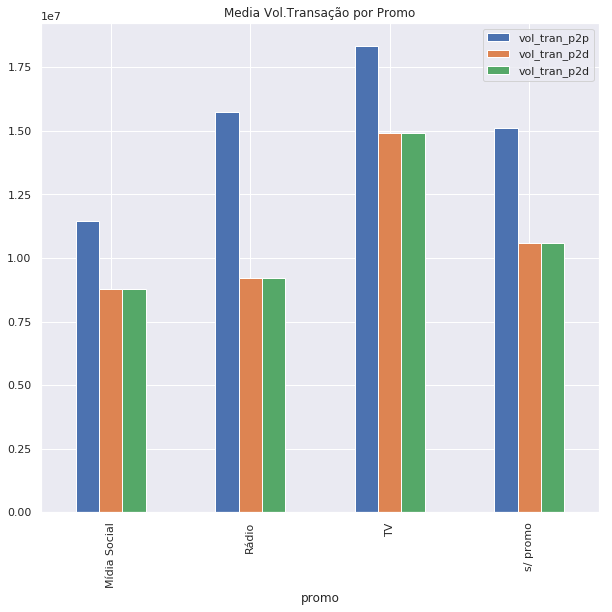

In [50]:
peipei_2017.groupby('promo')['vol_tran_p2p','vol_tran_p2d','vol_tran_p2d'].mean().plot(kind = 'bar', 
                                                                                       figsize = (10,9),
                                                                                      title=('Media Vol.Transação por Promo'));

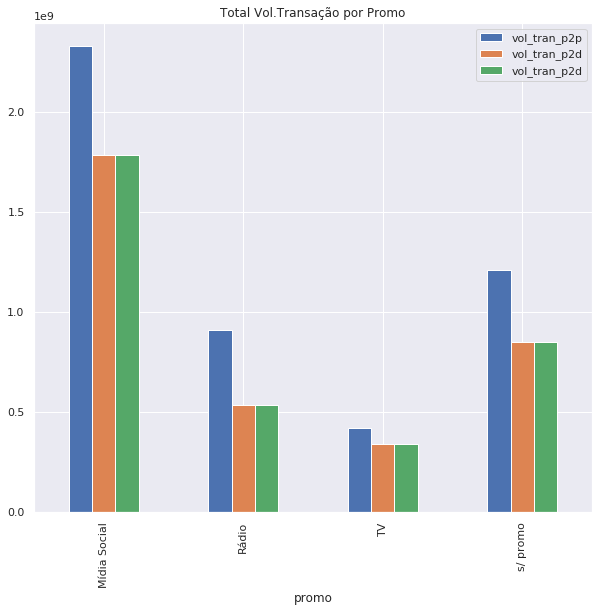

In [51]:
peipei_2017.groupby('promo')['vol_tran_p2p','vol_tran_p2d','vol_tran_p2d'].sum().plot(kind = 'bar', 
                                                                                       figsize = (10,9),
                                                                                      title=('Total Vol.Transação por Promo'));

In [52]:
#média de volume de transação por tipo de promoção
peipei_2017.groupby('promo')['vol_tran_p2p','vol_tran_p2d','vol_tran_p2d','num_user','ticket_p2p','ticket_p2b',
                             'ticket_p2d','num_user'].mean()

,vol_tran_p2p,vol_tran_p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d,num_user
promo,,,,,,,,
Mídia Social,11455622.69,8778405.15,8778405.15,2422226.30,10.00,10.00,9.75,2422226.30
Rádio,15735886.54,9222039.66,9222039.66,3256893.00,10.00,9.99,7.76,3256893.00
TV,18318963.11,14917674.22,14917674.22,3861879.96,10.01,10.00,10.43,3861879.96
s/ promo,15107151.50,10604381.33,10604381.33,3156963.66,10.00,10.00,9.75,3156963.66


***Semanal***

In [53]:
#semana com maior volume de operação p2p
semanal_2017  = peipei_2017.resample('W').sum()
semanal_2017.sort_values(by = 'p2p').tail()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,
2017-09-03,11283943,112740067.62,11267407,112659637.29,0,0.00,21783215,69.93,69.98,0.00
2017-07-30,11312610,113144820.89,11327629,113236997.94,0,0.00,21243709,69.99,69.96,0.00
2017-12-31,11528534,115236698.50,11532879,115135514.08,8644671,258992885.73,28847883,69.97,69.88,209.69
2017-11-26,11790201,117659860.63,11803144,118041827.15,8839910,265290668.47,29467553,69.90,70.00,210.13
2017-08-27,11803977,118099852.20,11794814,118122140.41,0,0.00,22561424,70.00,70.09,0.00


In [54]:
#olhando a semana com o maior volume de transações p2p.
peipei_2017.loc['2017-08-27' : '2017-09-02']

,dia_semana,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,promo,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,,,
2017-08-27,domingo,1065853,10651145.66,1065834,10631034.33,0,0.00,2125377,Mídia Social,9.99,9.97,0.00
2017-08-28,segunda-feira,1472459,14796931.72,1471225,14779283.49,0,0.00,2942346,Mídia Social,10.05,10.05,0.00
2017-08-29,terça-feira,2041745,20430273.80,2053629,20502178.60,0,0.00,4092317,s/ promo,10.01,9.98,0.00
2017-08-30,quarta-feira,1742439,17341408.37,1748588,17546269.83,0,0.00,3490451,s/ promo,9.95,10.03,0.00
2017-08-31,quinta-feira,1360761,13543471.35,1352010,13483976.29,0,0.00,2466387,Mídia Social,9.95,9.97,0.00
2017-09-01,sexta-feira,1862245,18596148.03,1853327,18485064.36,0,0.00,3705980,TV,9.99,9.97,0.00
2017-09-02,sábado,1623697,16281557.28,1609226,16127656.65,0,0.00,2940187,Rádio,10.03,10.02,0.00


In [55]:
#semana com maior volume de operação p2b
semanal_2017.sort_values(by = 'p2b').tail()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,
2017-09-03,11283943,112740067.62,11267407,112659637.29,0,0.00,21783215,69.93,69.98,0.00
2017-07-30,11312610,113144820.89,11327629,113236997.94,0,0.00,21243709,69.99,69.96,0.00
2017-12-31,11528534,115236698.50,11532879,115135514.08,8644671,258992885.73,28847883,69.97,69.88,209.69
2017-08-27,11803977,118099852.20,11794814,118122140.41,0,0.00,22561424,70.00,70.09,0.00
2017-11-26,11790201,117659860.63,11803144,118041827.15,8839910,265290668.47,29467553,69.90,70.00,210.13


Em 2017 a black friday foi em 24 de novembro, o que gera um maior uso do comércio digital e também impacta nos tipos de transação da peipei


In [56]:
#semana com maior volume de operação p2d
semanal_2017.sort_values(by = 'p2d').tail()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,
2017-12-03,10013893,100149204.87,10011740,100149347.73,7519476,225405867.01,25035578,69.99,70.00,209.83
2017-10-29,10228240,102484162.82,10228502,102314395.79,7682588,230432151.46,25571342,70.14,70.01,209.92
2017-12-24,10490412,104832855.84,10498621,104851376.49,7861036,235786887.87,26234850,69.99,69.90,210.07
2017-12-31,11528534,115236698.50,11532879,115135514.08,8644671,258992885.73,28847883,69.97,69.88,209.69
2017-11-26,11790201,117659860.63,11803144,118041827.15,8839910,265290668.47,29467553,69.90,70.00,210.13


A mesma semana possui o maior volume de transações p2d. Como a quantidade de transações impacta no volume, a semana da black friday o que faz com que tenhamos um ticket méido maior também, no caso das transaçoes p2p ela é o segunda colocada no ranking. 

In [57]:
#validando a hipótese da black friday
peipei_2017.loc[peipei_2017['vol_tran_p2d'].idxmax()]

dia_semana       sexta-feira
p2p                  3427566
vol_tran_p2p     34125741.79
p2b                  3435034
vol_tran_p2b     34372223.68
p2d                  2582596
vol_tran_p2d     77362208.35
num_user             8568123
promo           Mídia Social
ticket_p2p              9.96
ticket_p2b             10.01
ticket_p2d             29.96
Name: 2017-11-24 00:00:00, dtype: object

***Dia da Semana***

In [58]:
#valores totais por dia da semana
peipei_2017.groupby('dia_semana').sum()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia_semana,,,,,,,,,,
domingo,54687706,546951691.28,54770131,547742846.79,13664908,409902332.96,115143925,520.14,520.01,510.01
quarta-feira,75208519,752220207.24,75257363,753020731.32,17022217,511350107.39,157351803,520.06,520.31,480.65
quinta-feira,64372619,643606045.49,64412124,643893338.15,15143480,454109894.38,134374741,519.95,519.82,479.82
segunda-feira,77361480,773684057.11,77303651,772848884.36,17538403,526062301.75,162519411,520.05,519.85,479.96
sexta-feira,67661415,676953858.43,67627587,676284425.60,18262894,547715493.68,144144748,520.38,520.04,509.83
sábado,57420683,573970146.56,57409622,574119167.22,14155873,424639810.08,120170436,519.78,520.03,509.87
terça-feira,90066719,900695090.08,90045078,899572168.09,21155930,634571618.58,188287001,520.00,519.46,479.94


In [59]:
#valores médios por dia da semana.
peipei_2017.groupby('dia_semana').mean()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia_semana,,,,,,,,,,
domingo,1051686.65,10518301.76,1053271.75,10533516.28,262786.69,7882737.17,2214306.25,10.00,10.00,9.81
quarta-feira,1446317.67,14465773.22,1447256.98,14481167.91,327350.33,9833655.91,3025996.21,10.00,10.01,9.24
quinta-feira,1237934.98,12377039.34,1238694.69,12382564.20,291220.77,8732882.58,2584129.63,10.00,10.00,9.23
segunda-feira,1487720.77,14878539.56,1486608.67,14862478.55,337276.98,10116582.73,3125373.29,10.00,10.00,9.23
sexta-feira,1301181.06,13018343.43,1300530.52,13005469.72,351209.50,10532990.26,2772014.38,10.01,10.00,9.80
sábado,1104243.90,11037887.43,1104031.19,11040753.22,272228.33,8166150.19,2310969.92,10.00,10.00,9.81
terça-feira,1732052.29,17321059.42,1731636.12,17299464.77,406844.81,12203300.36,3620903.87,10.00,9.99,9.23


In [60]:
#desvio padrão por dia da semana
peipei_2017.groupby('dia_semana').std()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia_semana,,,,,,,,,,
domingo,191330.61,1904892.91,192239.65,1926173.94,387772.47,11629421.28,518389.75,0.03,0.03,14.21
quarta-feira,262923.85,2635177.03,262523.68,2626600.93,503761.33,15133092.63,630831.36,0.03,0.03,14.00
quinta-feira,262549.26,2620627.93,263273.36,2632543.22,449902.14,13490241.16,641376.54,0.03,0.02,13.98
segunda-feira,288375.32,2886786.37,288983.87,2893008.55,516977.41,15504714.22,664509.10,0.03,0.03,13.98
sexta-feira,377986.33,3760918.78,378625.17,3783546.58,560483.05,16805774.69,1031386.80,0.03,0.03,14.21
sábado,202820.13,2028446.55,202324.47,2022496.21,400982.70,12031364.40,524447.16,0.03,0.03,14.21
terça-feira,316315.57,3165645.20,317346.67,3176637.51,633103.31,18988444.10,868253.47,0.03,0.02,13.98


Mesmo o maior dia de volume ser a sexta-feira (dia 24/11) os volumes são maiores as terças feiras (notamos que também que o std é maior, o que indica um outlier) vamos filtrar o dataset para entender melhor

In [61]:
#olhando especificamente a terça-feira para entender por que os seus valores são maiores 
#do que a sexta(por exemplo)
peipei[peipei['dia_semana'].str.contains("terça")].max()
terca_2017 = peipei_2017.reset_index()

terca_2017[terca_2017['dia_semana'].str.contains("terça")].max()

dia             2017-12-26 00:00:00
dia_semana              terça-feira
p2p                         2355668
vol_tran_p2p            23471614.39
p2b                         2364377
vol_tran_p2b            23573107.03
p2d                         1768926
vol_tran_p2d            52969989.23
num_user                    5891448
promo                      s/ promo
ticket_p2p                    10.05
ticket_p2b                    10.04
ticket_p2d                    30.13
dtype: object

A terça feira é um dia onde muitas transações ocorrem, notamos também que o dia seguinte ao natal caiu em uma terça (esta é uma data de movimento nas lojas devido as trocas de presentes de natal)

**Hipótese** As pessoas utilizam o peipei nas suas trocas de natal

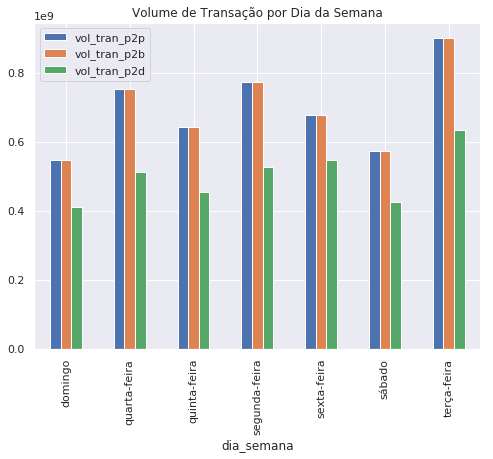

In [62]:
peipei_2017.groupby('dia_semana')[['vol_tran_p2p','vol_tran_p2b','vol_tran_p2d']].sum().plot(
    kind = 'bar',figsize = (8,6), title = ('Volume de Transação por Dia da Semana'));

Nota-se que o terça-feira é o dia da semana com maior volume (R$) de transacação para todos os tipos de produto.Analisamos abaixo as promoções as promoções por dia da semana.

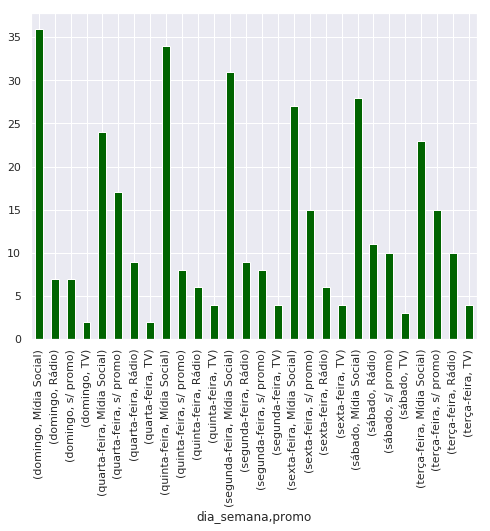

In [63]:
peipei_2017.groupby('dia_semana')['promo'].value_counts().plot(kind='bar',figsize = (8,6), color = 
                                                               'darkgreen');

In [64]:
peipei_2017.groupby('promo')['dia_semana'].value_counts()

promo         dia_semana   
Mídia Social  domingo          36
              quinta-feira     34
              segunda-feira    31
              sábado           28
              sexta-feira      27
              quarta-feira     24
              terça-feira      23
Rádio         sábado           11
              terça-feira      10
              quarta-feira      9
              segunda-feira     9
              domingo           7
              quinta-feira      6
              sexta-feira       6
TV            quinta-feira      4
              segunda-feira     4
              sexta-feira       4
              terça-feira       4
              sábado            3
              domingo           2
              quarta-feira      2
s/ promo      quarta-feira     17
              sexta-feira      15
              terça-feira      15
              sábado           10
              quinta-feira      8
              segunda-feira     8
              domingo           7
Name: dia_semana, dt

Nota-se que o domingo é o dia em que ocorre maior número total de promoções, porém o dia com maior volume de transações é a terça-feira.

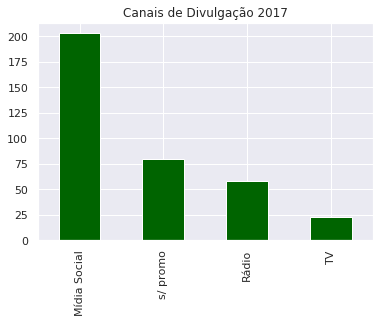

In [65]:
peipei_2017.promo.value_counts().plot(kind='bar', color = 'darkgreen', title=("Canais de Divulgação 2017"));

### ***2018*** ###

In [66]:
#2018
peipei_2018 = anual_peipei.loc['2018-01-01':'2018-12-31']
peipei_2018.head()

,dia_semana,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,promo,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,,,
2018-01-01,segunda-feira,1970078,19704129.26,1973333,19722469.93,1477957,44349152.50,4930957,Rádio,10.00,9.99,30.01
2018-01-02,terça-feira,2200292,22112551.65,2200881,21998542.15,1649611,49406050.40,5486412,Rádio,10.05,10.00,29.95
2018-01-03,quarta-feira,1871792,18754089.21,1866122,18715333.14,1404145,41986951.35,4660175,Rádio,10.02,10.03,29.90
2018-01-04,quinta-feira,1651972,16537688.63,1652489,16445457.33,1237573,37306939.97,4122672,Rádio,10.01,9.95,30.15
2018-01-05,sexta-feira,1205679,12038120.58,1205190,12064210.62,902034,27195769.50,3003992,Mídia Social,9.98,10.01,30.15


In [67]:
peipei_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Data columns (total 12 columns):
dia_semana      365 non-null object
p2p             365 non-null int64
vol_tran_p2p    365 non-null float64
p2b             365 non-null int64
vol_tran_p2b    365 non-null float64
p2d             365 non-null int64
vol_tran_p2d    365 non-null float64
num_user        365 non-null int64
promo           365 non-null object
ticket_p2p      365 non-null float64
ticket_p2b      365 non-null float64
ticket_p2d      365 non-null float64
dtypes: float64(6), int64(4), object(2)
memory usage: 37.1+ KB


In [68]:
#estatísca descritiva distriuição 2017
peipei_2018.describe()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
count,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00
mean,1784699.61,17845426.08,1784634.75,17846167.12,1338283.68,40138151.79,4461801.88,10.00,10.00,29.99
std,467087.30,4670382.40,465826.76,4659488.93,349666.31,10482159.36,1166646.13,0.03,0.03,0.08
min,1042663.00,10454887.23,1043857.00,10444928.76,782980.00,23600403.73,2605688.00,9.95,9.95,29.85
25%,1435869.00,14368301.95,1438273.00,14354977.84,1072522.00,32300934.36,3588135.00,9.98,9.98,29.93
50%,1717021.00,17181761.14,1711596.00,17137087.55,1283793.00,38561665.04,4275246.00,10.00,10.00,29.99
75%,2038114.00,20458587.04,2028943.00,20297066.58,1523208.00,45815535.35,5071671.00,10.02,10.03,30.06
max,4998636.00,49860442.99,4984078.00,50000932.80,3745156.00,112280436.03,12492000.00,10.05,10.05,30.15


In [69]:
print('O total de transações p2p em 2018 é de:', peipei_2018['p2p'].sum())
print('O total de transações p2b em 2018 é de:',peipei_2018['p2b'].sum())
print('O total de transações p2d em 2018 é de:',peipei_2018['p2d'].sum())

O total de transações p2p em 2018 é de: 651415358
O total de transações p2b em 2018 é de: 651391685
O total de transações p2d em 2018 é de: 488473543


In [70]:
total_transacoes_2018 = peipei_2018['p2p'].sum() + peipei_2018['p2b'].sum()+ peipei_2018['p2d'].sum()
print(total_transacoes_2018)

1791280586


In [71]:
print('A % p2p em 2018 é de:', peipei_2018['p2p'].sum() / total_transacoes_2018)
print('A % p2b em 2018 é de:',peipei_2018['p2b'].sum() / total_transacoes_2018)
print('A % p2d em 2018 é de:',peipei_2018['p2d'].sum()/total_transacoes_2018)

A % p2p em 2018 é de: 0.36365902868106004
A % p2b em 2018 é de: 0.3636458129960439
A % p2d em 2018 é de: 0.27269515832289604


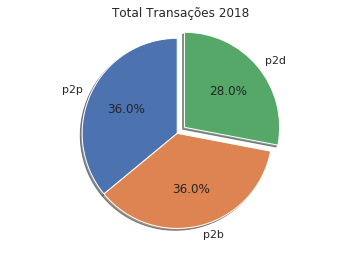

In [72]:
#gráfico total transações 2018
label ='p2p', 'p2b','p2d'
size = [36,36,28]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
plt.title('Total Transações 2018')
ax1.pie(size, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');


In [73]:
print('O volume (R$) p2p em 2018 é de:', peipei_2018['vol_tran_p2p'].sum())
print('volume (R$) p2b em 2018 é de:',peipei_2018['vol_tran_p2b'].sum())
print('volume (R$) p2d em 2018 é de:',peipei_2018['vol_tran_p2d'].sum())

O volume (R$) p2p em 2018 é de: 6513580518.400001
volume (R$) p2b em 2018 é de: 6513850998.07
volume (R$) p2d em 2018 é de: 14650425403.849998


In [74]:
total_volume_2018 = peipei_2018['vol_tran_p2p'].sum() + peipei_2018['vol_tran_p2b'].sum()+ peipei_2018['vol_tran_p2d'].sum()
print(total_volume_2018)

27677856920.32


In [75]:
print('A % p2p em 2018 é de:', peipei_2018['vol_tran_p2p'].sum() / total_volume_2018)
print('A % p2b em 2018 é de:',peipei_2018['vol_tran_p2b'].sum() / total_volume_2018)
print('A % p2d em 2018 é de:',peipei_2018['vol_tran_p2d'].sum() / total_volume_2018)

A % p2p em 2018 é de: 0.23533543572941823
A % p2b em 2018 é de: 0.23534520815041085
A % p2d em 2018 é de: 0.5293193561201709


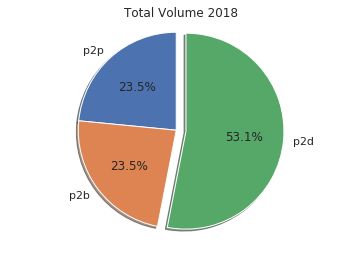

In [76]:
#gráfico volume (R$) 2018
label ='p2p', 'p2b','p2d'
size = [23,23,52]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
plt.title('Total Volume 2018')
ax1.pie(size, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');

In [77]:
#criando dataset com todos as médias do ano de 2018
media_2018 = peipei_2018.resample('M').mean()
media_2018 = media_2018.reset_index()
media_2018 = media_2018.loc[0:11]
media_2018['total_transacao'] = media_2018.p2p+ media_2018.p2d + media_2018.p2d
media_2018['total_volume'] = media_2018.vol_tran_p2p+ media_2018.vol_tran_p2b + media_2018.vol_tran_p2d
media_2018.head(20)

,dia,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d,total_transacao,total_volume
0,2018-01-31,1534064.35,15346524.58,1535029.29,15362552.68,1151993.26,34569393.41,3836675.00,10.00,10.01,30.01,3838050.87,65278470.66
1,2018-02-28,1538179.21,15371236.65,1539876.21,15377477.49,1153206.57,34628362.66,3845845.04,9.99,9.99,30.03,3844592.36,65377076.80
2,2018-03-31,1528486.16,15277816.57,1527482.42,15276077.35,1146011.48,34369664.67,3819379.42,10.00,10.00,29.99,3820509.13,64923558.60
3,2018-04-30,1603661.73,16012095.82,1604706.63,16041252.73,1203688.07,36130755.68,4012457.63,9.98,10.00,30.01,4011037.87,68184104.23
4,2018-05-31,1765738.71,17651865.86,1766122.29,17651993.20,1324980.87,39741276.27,4416655.71,10.00,10.00,29.99,4415700.45,75045135.33
5,2018-06-30,1676028.67,16773317.95,1675369.30,16748422.25,1257584.80,37716968.60,4191633.10,10.01,10.00,29.99,4191198.27,71238708.80
6,2018-07-31,1867947.10,18677937.07,1866867.52,18668107.14,1400945.19,42005936.72,4668309.90,10.00,10.00,29.98,4669837.48,79351980.94
7,2018-08-31,1847510.74,18467730.35,1846192.61,18463613.43,1382991.81,41450212.32,4614553.35,10.00,10.00,29.97,4613494.35,78381556.10
8,2018-09-30,1888574.93,18893474.90,1888751.60,18884735.95,1415516.13,42417705.10,4718613.57,10.00,10.00,29.97,4719607.20,80195915.95
9,2018-10-31,1932425.97,19331671.13,1932875.61,19336513.35,1448864.19,43463711.92,4832458.71,10.00,10.01,29.99,4830154.35,82131896.41


In [78]:
#substituindo dia por mês
mes = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
media_2018['dia'] = mes
media_2018.columns=(['mes','p2p','vol_tran_p2p','p2b','vol_tran_p2b','p2d','vol_tran_p2d','num_user','ticket_p2p','ticket_p2b',
                     'ticket_p2d','total_transacao','total_volume'])
media_2018.head(12)

,mes,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d,total_transacao,total_volume
0,jan,1534064.35,15346524.58,1535029.29,15362552.68,1151993.26,34569393.41,3836675.00,10.00,10.01,30.01,3838050.87,65278470.66
1,fev,1538179.21,15371236.65,1539876.21,15377477.49,1153206.57,34628362.66,3845845.04,9.99,9.99,30.03,3844592.36,65377076.80
2,mar,1528486.16,15277816.57,1527482.42,15276077.35,1146011.48,34369664.67,3819379.42,10.00,10.00,29.99,3820509.13,64923558.60
3,abr,1603661.73,16012095.82,1604706.63,16041252.73,1203688.07,36130755.68,4012457.63,9.98,10.00,30.01,4011037.87,68184104.23
4,mai,1765738.71,17651865.86,1766122.29,17651993.20,1324980.87,39741276.27,4416655.71,10.00,10.00,29.99,4415700.45,75045135.33
5,jun,1676028.67,16773317.95,1675369.30,16748422.25,1257584.80,37716968.60,4191633.10,10.01,10.00,29.99,4191198.27,71238708.80
6,jul,1867947.10,18677937.07,1866867.52,18668107.14,1400945.19,42005936.72,4668309.90,10.00,10.00,29.98,4669837.48,79351980.94
7,ago,1847510.74,18467730.35,1846192.61,18463613.43,1382991.81,41450212.32,4614553.35,10.00,10.00,29.97,4613494.35,78381556.10
8,set,1888574.93,18893474.90,1888751.60,18884735.95,1415516.13,42417705.10,4718613.57,10.00,10.00,29.97,4719607.20,80195915.95
9,out,1932425.97,19331671.13,1932875.61,19336513.35,1448864.19,43463711.92,4832458.71,10.00,10.01,29.99,4830154.35,82131896.41


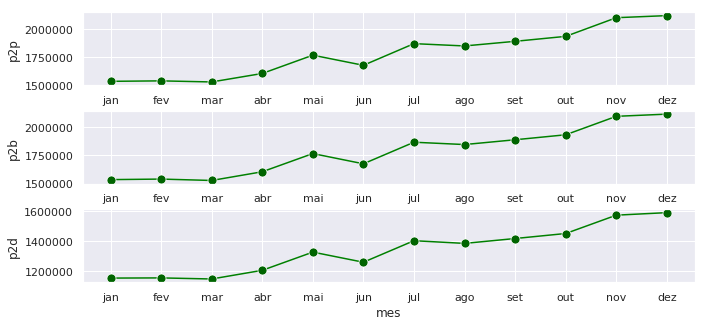

In [79]:
#Evolução da média de transação
dados3 = ['p2p','p2p','p2b', 'p2d']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

for col, ax in zip(dados1[1:], axs.ravel()):
    sns.lineplot(x='mes',y=col,data=media_2018, ax=ax, marker = 'o',   markerfacecolor='darkgreen', 
             markersize=9 ,sort = False, color = 'green')
    plt.subplots_adjust(top=0.95, bottom=0.2, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3);


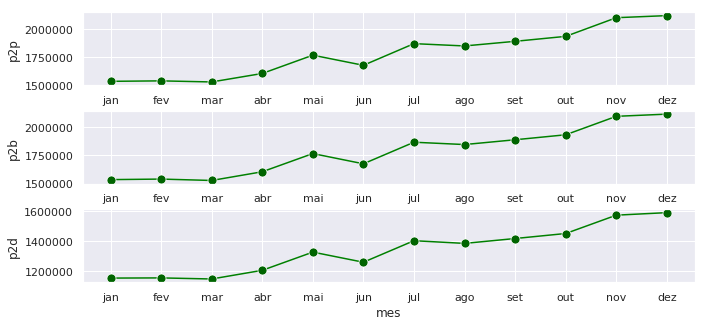

In [80]:
#Evolução média volume
dados4 = ['vol_tran_p2p','vol_tran_p2p','vol_tran_p2d','vol_tran_p2d']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

for col, ax in zip(dados1[1:], axs.ravel()):
    sns.lineplot(x='mes',y=col,data=media_2018, ax=ax, marker = 'o',   markerfacecolor='darkgreen', 
             markersize=9 ,sort = False, color = 'green')
    plt.subplots_adjust(top=0.95, bottom=0.2, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3);


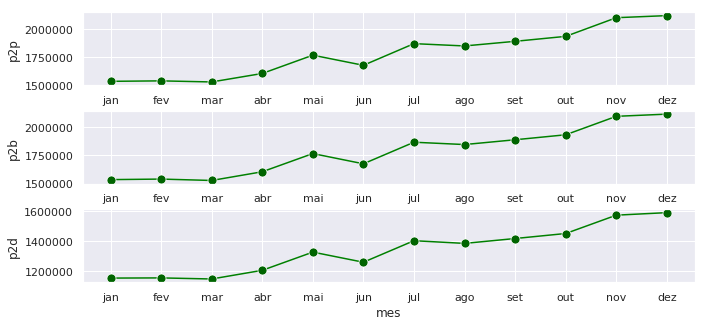

In [81]:
#Evolução ticket médio
dados4 = ['ticket_p2p','ticket_p2p','ticket_p2b','ticket_p2d']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

for col, ax in zip(dados1[1:], axs.ravel()):
    sns.lineplot(x='mes',y=col,data=media_2018, ax=ax, marker = 'o',   markerfacecolor='darkgreen', 
             markersize=9 ,sort = False, color = 'green')
    plt.subplots_adjust(top=0.95, bottom=0.2, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3);

In [82]:
print('Ticket Médio p2p',peipei_2018.ticket_p2p.mean())
print('Ticket Médio p2b',peipei_2018.ticket_p2b.mean())
print('Ticket Médio p2d',peipei_2018.ticket_p2d.mean())

Ticket Médio p2p 9.999015452560778
Ticket Médio p2b 9.999878191977706
Ticket Médio p2d 29.99322101298346


In [83]:
media_2018.groupby('mes', sort = False)['p2p','p2b','p2d','vol_tran_p2p','vol_tran_p2d','vol_tran_p2d','ticket_p2p','ticket_p2p',
                           'ticket_p2p','ticket_p2p','num_user'].mean()

,p2p,p2b,p2d,vol_tran_p2p,vol_tran_p2d,vol_tran_p2d,ticket_p2p,ticket_p2p,ticket_p2p,ticket_p2p,num_user
mes,,,,,,,,,,,
jan,1534064.35,1535029.29,1151993.26,15346524.58,34569393.41,34569393.41,10.00,10.00,10.00,10.00,3836675.00
fev,1538179.21,1539876.21,1153206.57,15371236.65,34628362.66,34628362.66,9.99,9.99,9.99,9.99,3845845.04
mar,1528486.16,1527482.42,1146011.48,15277816.57,34369664.67,34369664.67,10.00,10.00,10.00,10.00,3819379.42
abr,1603661.73,1604706.63,1203688.07,16012095.82,36130755.68,36130755.68,9.98,9.98,9.98,9.98,4012457.63
mai,1765738.71,1766122.29,1324980.87,17651865.86,39741276.27,39741276.27,10.00,10.00,10.00,10.00,4416655.71
jun,1676028.67,1675369.30,1257584.80,16773317.95,37716968.60,37716968.60,10.01,10.01,10.01,10.01,4191633.10
jul,1867947.10,1866867.52,1400945.19,18677937.07,42005936.72,42005936.72,10.00,10.00,10.00,10.00,4668309.90
ago,1847510.74,1846192.61,1382991.81,18467730.35,41450212.32,41450212.32,10.00,10.00,10.00,10.00,4614553.35
set,1888574.93,1888751.60,1415516.13,18893474.90,42417705.10,42417705.10,10.00,10.00,10.00,10.00,4718613.57


In [84]:
marco_2018 = peipei_2018.loc['2018-03-01':'2018-03-31']
marco_2018.sum()

dia_semana      quinta-feirasexta-feirasábadodomingosegunda-fe...
p2p                                                      47383071
vol_tran_p2p                                         473612313.78
p2b                                                      47351955
vol_tran_p2b                                         473558397.85
p2d                                                      35526356
vol_tran_p2d                                        1065459604.84
num_user                                                118400762
promo           Mídia Socials/ promoMídia Socials/ promoMídia ...
ticket_p2p                                                 309.86
ticket_p2b                                                 310.00
ticket_p2d                                                 929.73
dtype: object

In [85]:
abril_2018 = peipei_2018.loc['2018-04-01':'2018-04-30']
abril_2018.sum()

dia_semana      domingosegunda-feiraterça-feiraquarta-feiraqui...
p2p                                                      48109852
vol_tran_p2p                                         480362874.45
p2b                                                      48141199
vol_tran_p2b                                         481237581.93
p2d                                                      36110642
vol_tran_p2d                                        1083922670.48
num_user                                                120373729
promo           s/ promoMídia SocialMídia SocialMídia SocialTV...
ticket_p2p                                                 299.54
ticket_p2b                                                 299.92
ticket_p2d                                                 900.43
dtype: object

In [86]:
abril_2018.mean()

p2p             1603661.73
vol_tran_p2p   16012095.82
p2b             1604706.63
vol_tran_p2b   16041252.73
p2d             1203688.07
vol_tran_p2d   36130755.68
num_user        4012457.63
ticket_p2p            9.98
ticket_p2b           10.00
ticket_p2d           30.01
dtype: float64

In [87]:
marco_2018.mean()

p2p             1528486.16
vol_tran_p2p   15277816.57
p2b             1527482.42
vol_tran_p2b   15276077.35
p2d             1146011.48
vol_tran_p2d   34369664.67
num_user        3819379.42
ticket_p2p           10.00
ticket_p2b           10.00
ticket_p2d           29.99
dtype: float64

In [88]:
media_2018.groupby('mes', sort=False)['p2p','p2b','p2d','vol_tran_p2p','vol_tran_p2d','vol_tran_p2d','ticket_p2p','ticket_p2p',
                           'ticket_p2p','ticket_p2p','num_user'].sum()

,p2p,p2b,p2d,vol_tran_p2p,vol_tran_p2d,vol_tran_p2d,ticket_p2p,ticket_p2p,ticket_p2p,ticket_p2p,num_user
mes,,,,,,,,,,,
jan,1534064.35,1535029.29,1151993.26,15346524.58,34569393.41,34569393.41,10.00,10.00,10.00,10.00,3836675.00
fev,1538179.21,1539876.21,1153206.57,15371236.65,34628362.66,34628362.66,9.99,9.99,9.99,9.99,3845845.04
mar,1528486.16,1527482.42,1146011.48,15277816.57,34369664.67,34369664.67,10.00,10.00,10.00,10.00,3819379.42
abr,1603661.73,1604706.63,1203688.07,16012095.82,36130755.68,36130755.68,9.98,9.98,9.98,9.98,4012457.63
mai,1765738.71,1766122.29,1324980.87,17651865.86,39741276.27,39741276.27,10.00,10.00,10.00,10.00,4416655.71
jun,1676028.67,1675369.30,1257584.80,16773317.95,37716968.60,37716968.60,10.01,10.01,10.01,10.01,4191633.10
jul,1867947.10,1866867.52,1400945.19,18677937.07,42005936.72,42005936.72,10.00,10.00,10.00,10.00,4668309.90
ago,1847510.74,1846192.61,1382991.81,18467730.35,41450212.32,41450212.32,10.00,10.00,10.00,10.00,4614553.35
set,1888574.93,1888751.60,1415516.13,18893474.90,42417705.10,42417705.10,10.00,10.00,10.00,10.00,4718613.57


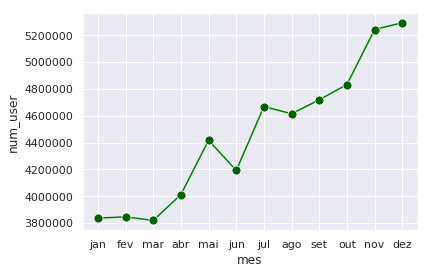

In [89]:
#Evolução média de usuários por mês
sns.lineplot(x='mes',y='num_user',data=media_2018, marker = 'o',   markerfacecolor='darkgreen', markersize=9 ,sort = False, color = 'green');

In [90]:
soma_2018 = anual_peipei.resample('M').sum()
soma_2018 = soma_2018.reset_index()
soma_2018 = soma_2018.loc[0:11]
soma_2018['dia'] = mes
soma_2018.tail()

,dia,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
7,ago,46754031,467505834.34,46751339,467685597.46,0,0.00,91253460,309.93,310.10,0.00
8,set,39511537,395083227.54,39487376,394636604.69,20674210,620282378.75,91618959,299.98,299.85,689.92
9,out,41735445,417667611.50,41776899,417554231.13,31305855,939696541.05,104368999,310.23,309.82,930.46
10,nov,43525382,434880725.60,43461114,434590158.97,32607373,978598218.65,108726483,299.81,299.96,900.45
11,dez,43126816,430993528.39,43161190,431095053.00,32356267,969774420.37,107913216,309.84,309.65,929.26


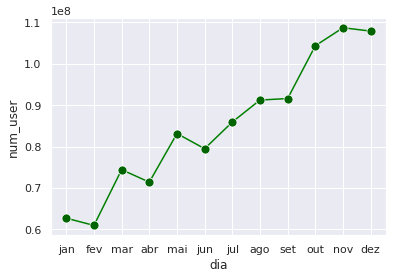

In [91]:
#Evolução soma de usuários por mês
sns.lineplot(x='dia',y='num_user',data=soma_2018, marker = 'o',  
             markerfacecolor='darkgreen', markersize=9 ,sort = False, color = 'green');

In [92]:
#variabilidade ao longo dos meses
peipei_2018.resample('M').std()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,
2018-01-31,329367.91,3299025.80,329304.55,3284012.60,248059.13,7408289.84,822265.60,0.02,0.03,0.09
2018-02-28,325935.40,3253037.89,324825.53,3237694.36,243544.61,7305723.31,812411.88,0.03,0.03,0.08
2018-03-31,326460.42,3262398.73,324380.17,3250324.38,243925.49,7323277.71,813261.91,0.03,0.03,0.08
2018-04-30,292191.52,2918649.71,291390.21,2903092.52,218117.62,6570162.20,728503.97,0.03,0.03,0.07
2018-05-31,427253.05,4275923.58,424479.31,4222782.25,320389.60,9652045.50,1065863.29,0.03,0.03,0.08
2018-06-30,444036.27,4459545.99,444269.39,4430246.77,333611.99,10023030.49,1114560.67,0.03,0.03,0.08
2018-07-31,407041.45,4057408.80,405621.79,4052179.89,305754.71,9177357.35,1018410.17,0.03,0.03,0.09
2018-08-31,379984.04,3800900.04,378231.90,3795529.42,282908.23,8494290.68,946838.09,0.03,0.03,0.09
2018-09-30,446787.78,4477753.66,445722.46,4479551.30,334243.78,10017454.50,1113959.52,0.03,0.03,0.07


**Promoção**

In [93]:
#média de volume de transação por tipo de promoção
peipei_2018.groupby('promo')['vol_tran_p2p','vol_tran_p2d','vol_tran_p2d'].mean()

,vol_tran_p2p,vol_tran_p2d,vol_tran_p2d
promo,,,
Mídia Social,15476512.41,34812339.00,34812339.00
Rádio,21727163.81,48854100.80,48854100.80
TV,22183151.39,49961364.02,49961364.02
s/ promo,19536185.47,43922763.81,43922763.81


In [94]:
#ticket médio por tipo de promoção
peipei_2018.groupby('promo')['ticket_p2p','ticket_p2b','ticket_p2d'].mean()

,ticket_p2p,ticket_p2b,ticket_p2d
promo,,,
Mídia Social,10.00,10.00,29.99
Rádio,10.00,10.00,30.01
TV,9.99,9.99,30.00
s/ promo,9.99,10.00,29.98


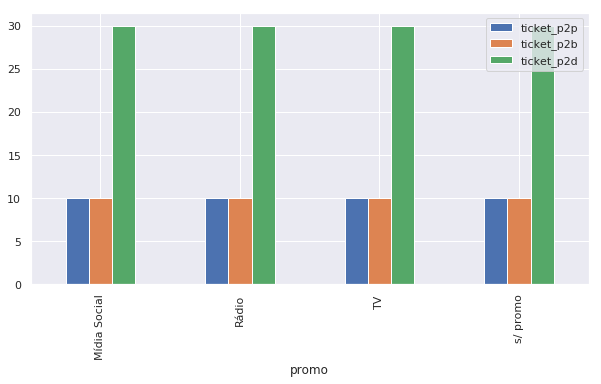

In [95]:
#ticket médio por tipo de promoção
peipei_2018.groupby('promo')['ticket_p2p','ticket_p2b','ticket_p2d'].mean().plot(kind='bar',figsize = (10,5));

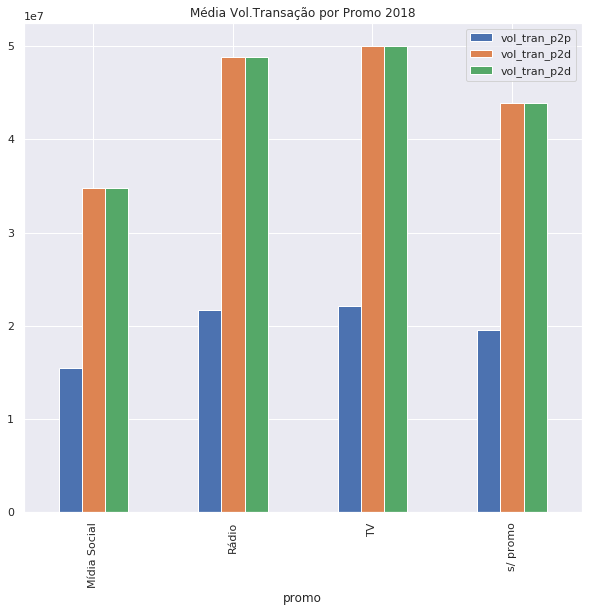

In [96]:
#média de volume de transação por tipo de promoção
peipei_2018.groupby('promo')['vol_tran_p2p','vol_tran_p2d','vol_tran_p2d'].mean().plot(kind = 'bar', 
                                                                                       figsize = (10,9),
                                                                                      title=('Média Vol.Transação por Promo 2018'));

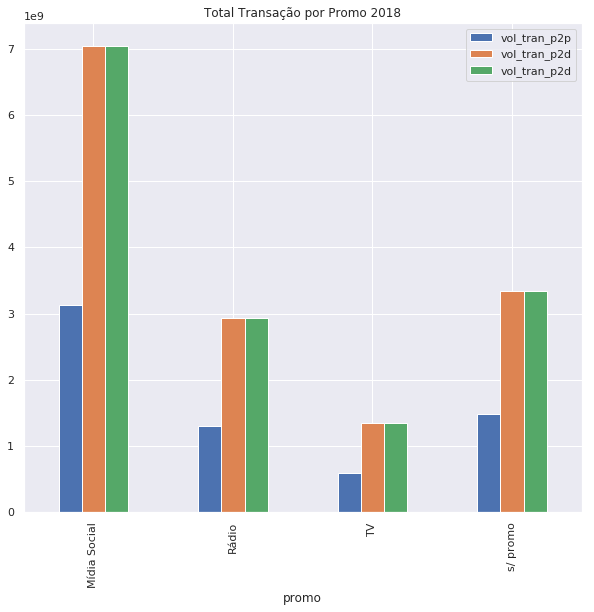

In [97]:
peipei_2018.groupby('promo')['vol_tran_p2p','vol_tran_p2d','vol_tran_p2d'].sum().plot(kind = 'bar', 
                                                                                       figsize = (10,9),
                                                                                      title=('Total Transação por Promo 2018'));

In [98]:
#média de volume de transação por tipo de promoção
peipei_2018.groupby('promo')['vol_tran_p2p','vol_tran_p2d','vol_tran_p2d','num_user','ticket_p2p','ticket_p2b',
                             'ticket_p2d','num_user'].mean()

,vol_tran_p2p,vol_tran_p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d,num_user
promo,,,,,,,,
Mídia Social,15476512.41,34812339.00,34812339.00,3869907.68,10.00,10.00,29.99,3869907.68
Rádio,21727163.81,48854100.80,48854100.80,5429166.00,10.00,10.00,30.01,5429166.00
TV,22183151.39,49961364.02,49961364.02,5551085.37,9.99,9.99,30.00,5551085.37
s/ promo,19536185.47,43922763.81,43922763.81,4884303.58,9.99,10.00,29.98,4884303.58


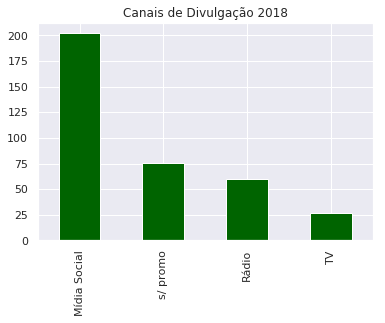

In [99]:
# canais de promoção
peipei_2018.promo.value_counts().plot(kind='bar', color = 'darkgreen', title=("Canais de Divulgação 2018")
                                     );

***Semanal***

In [100]:
#semana com maior volume de operação p2p
semanal_2018  = peipei_2018.resample('W').sum()
semanal_2018.sort_values(by = 'p2p').tail()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,
2018-10-28,14914723,149206224.91,14925034,149475221.82,11191384,335681912.30,37309229,70.05,70.13,210.04
2018-12-16,15069648,150670629.83,15095301,151350747.27,11317793,339135183.07,37713362,70.02,70.20,209.74
2018-12-30,15188332,151863025.53,15199062,151885890.96,11399498,341662498.93,38011428,69.99,69.96,209.79
2018-12-23,15648561,156745811.50,15622687,156255658.66,11726056,352063347.06,39114662,70.11,70.03,210.21
2018-11-25,17507228,174878692.14,17495461,174985753.53,13111596,392717547.18,43730006,69.94,69.96,209.65


In [101]:
#semana com maior volume de operação p2b
semanal_2018.sort_values(by = 'p2b').tail()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,
2018-10-28,14914723,149206224.91,14925034,149475221.82,11191384,335681912.30,37309229,70.05,70.13,210.04
2018-12-16,15069648,150670629.83,15095301,151350747.27,11317793,339135183.07,37713362,70.02,70.20,209.74
2018-12-30,15188332,151863025.53,15199062,151885890.96,11399498,341662498.93,38011428,69.99,69.96,209.79
2018-12-23,15648561,156745811.50,15622687,156255658.66,11726056,352063347.06,39114662,70.11,70.03,210.21
2018-11-25,17507228,174878692.14,17495461,174985753.53,13111596,392717547.18,43730006,69.94,69.96,209.65


In [102]:
#semana com maior volume de operação p2d
semanal_2018.sort_values(by = 'p2d').tail()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia,,,,,,,,,,
2018-10-28,14914723,149206224.91,14925034,149475221.82,11191384,335681912.30,37309229,70.05,70.13,210.04
2018-12-16,15069648,150670629.83,15095301,151350747.27,11317793,339135183.07,37713362,70.02,70.20,209.74
2018-12-30,15188332,151863025.53,15199062,151885890.96,11399498,341662498.93,38011428,69.99,69.96,209.79
2018-12-23,15648561,156745811.50,15622687,156255658.66,11726056,352063347.06,39114662,70.11,70.03,210.21
2018-11-25,17507228,174878692.14,17495461,174985753.53,13111596,392717547.18,43730006,69.94,69.96,209.65


Notamos que a semana da blackfriday tem o maior volume de operação de todos os tipos de transação

***Dia da Semana***

In [103]:
#valores totais por dia da semana
peipei_2018.groupby('dia_semana').sum()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia_semana,,,,,,,,,,
domingo,73500518,735052681.22,73542021,735427842.81,55171123,1654330962.24,183818072,519.99,519.97,1559.11
quarta-feira,99657346,997001094.34,99605156,995338416.67,74747202,2241381190.69,249118019,520.20,519.65,1559.24
quinta-feira,88696842,886562167.63,88765674,887881576.85,66494358,1995506021.93,221812747,519.78,520.16,1560.56
segunda-feira,107414280,1073895883.42,107350871,1073431481.84,80475925,2414423901.17,268431421,529.88,530.01,1590.24
sexta-feira,91253138,912237497.25,91231698,913060034.42,68441426,2052762975.77,228070363,519.84,520.39,1559.55
sábado,75486633,754777760.89,75566974,755444084.49,56618568,1697806615.09,188796672,519.97,519.78,1559.67
terça-feira,115406601,1154053433.65,115329291,1153267560.99,86524941,2594213736.96,288510394,519.97,520.00,1559.17


In [104]:
#valores médios por dia da semana.
peipei_2018.groupby('dia_semana').mean()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia_semana,,,,,,,,,,
domingo,1413471.50,14135628.49,1414269.63,14142843.13,1060983.13,31814056.97,3534962.92,10.00,10.00,29.98
quarta-feira,1916487.42,19173097.97,1915483.77,19141123.40,1437446.19,43103484.44,4790731.13,10.00,9.99,29.99
quinta-feira,1705708.50,17049272.45,1707032.19,17074645.71,1278737.65,38375115.81,4265629.75,10.00,10.00,30.01
segunda-feira,2026684.53,20262186.48,2025488.13,20253424.19,1518413.68,45555167.95,5064743.79,10.00,10.00,30.00
sexta-feira,1754868.04,17543028.79,1754455.73,17558846.82,1316181.27,39476211.07,4385968.52,10.00,10.01,29.99
sábado,1451666.02,14514956.94,1453211.04,14527770.86,1088818.62,32650127.21,3630705.23,10.00,10.00,29.99
terça-feira,2219357.71,22193335.26,2217870.98,22178222.33,1663941.17,49888725.71,5548276.81,10.00,10.00,29.98


In [105]:
#desvio padrão por dia da semana
peipei_2018.groupby('dia_semana').std()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,ticket_p2p,ticket_p2b,ticket_p2d
dia_semana,,,,,,,,,,
domingo,275610.70,2762325.94,275610.49,2761464.40,206310.23,6205883.76,688917.99,0.03,0.03,0.08
quarta-feira,369732.83,3706401.36,369053.54,3683787.66,277536.59,8333499.57,924515.22,0.03,0.03,0.08
quinta-feira,308289.68,3078817.25,309208.90,3089288.58,230612.24,6915958.37,770824.59,0.02,0.03,0.09
segunda-feira,367223.27,3669608.85,366104.11,3653333.34,273983.40,8199916.21,913304.59,0.03,0.03,0.09
sexta-feira,553709.17,5526859.32,551046.99,5526022.71,414908.68,12450234.07,1383545.39,0.03,0.03,0.09
sábado,277380.86,2766449.77,279737.13,2809144.81,208048.91,6197259.43,695085.93,0.03,0.03,0.08
terça-feira,443102.59,4436347.11,440870.97,4405728.16,331745.78,9930514.71,1107248.53,0.02,0.03,0.07


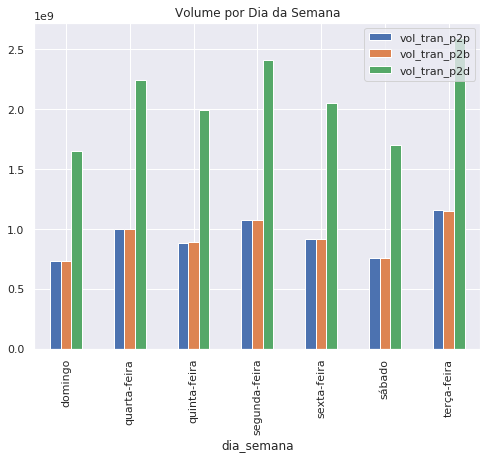

In [106]:
#dia da semana total
peipei_2018.groupby('dia_semana')[['vol_tran_p2p','vol_tran_p2b','vol_tran_p2d']].sum().plot(
    kind = 'bar',figsize = (8,6), title=('Volume por Dia da Semana'));

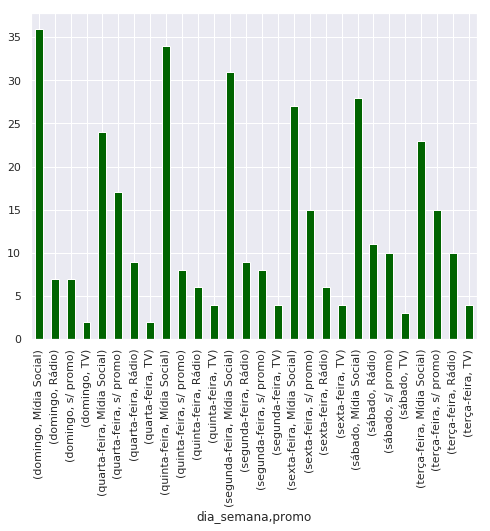

In [107]:
peipei_2017.groupby('dia_semana')['promo'].value_counts().plot(kind='bar',figsize = (8,6), color = 
                                                               'darkgreen');

In [108]:
peipei_2018.groupby('promo')['dia_semana'].value_counts()

promo         dia_semana   
Mídia Social  domingo          35
              sábado           31
              terça-feira      30
              quarta-feira     28
              segunda-feira    27
              sexta-feira      26
              quinta-feira     25
Rádio         quinta-feira     13
              quarta-feira     11
              segunda-feira     9
              sexta-feira       8
              terça-feira       7
              domingo           6
              sábado            6
TV            sábado            7
              domingo           4
              quarta-feira      4
              terça-feira       4
              segunda-feira     3
              sexta-feira       3
              quinta-feira      2
s/ promo      sexta-feira      15
              segunda-feira    14
              quinta-feira     12
              terça-feira      11
              quarta-feira      9
              sábado            8
              domingo           7
Name: dia_semana, dt

## Taxa de Crescimento##

1. Anual

In [109]:
#criando um dataframe para agrupar as infos
taxa_crescimento = peipei.copy()
taxa_crescimento['ano']= taxa_crescimento.dia.astype('str').str.slice(stop = 4)
taxa_crescimento['mes']= taxa_crescimento.dia.astype('str').str.slice(start=5, stop=7)
taxa_crescimento.fillna(value = 0, inplace = True) #colocando 0 nos nan
taxa_crescimento.tail()

,dia,dia_semana,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,promo,ano,mes
724,2018-12-27,quinta-feira,2354160,23425489.08,2363343,23626043.12,1769620,53162442.34,5914322,Rádio,2018,12
725,2018-12-28,sexta-feira,2138581,21461771.61,2151555,21542020.19,1609052,48141810.47,5360004,s/ promo,2018,12
726,2018-12-29,sábado,1854058,18584702.90,1860467,18541150.49,1388730,41723227.00,4649793,s/ promo,2018,12
727,2018-12-30,domingo,1490585,14885272.82,1490591,14951793.89,1116548,33439563.36,3723071,Mídia Social,2018,12
728,2018-12-31,segunda-feira,2850053,28567984.12,2852631,28451644.95,2136237,63785036.00,7108372,Rádio,2018,12


In [110]:
#taxa de crescimento comparado 2017/2018
taxa_crescimento.groupby('ano')[['p2p','vol_tran_p2p','p2b','vol_tran_p2b','p2d','vol_tran_p2d',
                               'num_user']].sum().pct_change()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user
ano,,,,,,,
2017,nan,nan,nan,nan,nan,nan,nan
2018,0.34,0.34,0.34,0.34,3.18,3.18,0.59


A taxa de crescimento comparando de 2017 para 2018 foi de

* p2p = 34%
* p2b = 34%
* p2d = 318%

2. Mensal

In [111]:
taxa_crescimentoMes = taxa_crescimento.groupby(['ano','mes'])[['p2p','vol_tran_p2p','p2b','vol_tran_p2b','p2d','vol_tran_p2d',
                               'num_user']].sum().pct_change()

In [112]:
taxa_crescimentoMes.head(12)

p2p  vol_tran_p2p   p2b  vol_tran_p2b   p2d  vol_tran_p2d  num_user
ano  mes                                                                      
2017 01    nan           nan   nan           nan   nan           nan       nan
     02  -0.03         -0.03 -0.03         -0.03   nan           nan     -0.03
     03   0.21          0.21  0.21          0.20   nan           nan      0.22
     04  -0.02         -0.02 -0.02         -0.02   nan           nan     -0.04
     05   0.14          0.14  0.14          0.14   nan           nan      0.16
     06  -0.03         -0.03 -0.03         -0.03   nan           nan     -0.04
     07   0.07          0.07  0.07          0.07   nan           nan      0.08
     08   0.04          0.04  0.04          0.04   nan           nan      0.06
     09  -0.15         -0.15 -0.16         -0.16   inf           inf      0.00
     10   0.06          0.06  0.06          0.06  0.51          0.51      0.14
     11   0.04          0.04  0.04          0.04  0.04          0.04      0.04
     12  -0.01         -0.01 -0.01         -0.01 -0.01         -0.01     -0.01

In [113]:
taxa_crescimentoMes.loc['2017'].mean()

p2p            0.03
vol_tran_p2p   0.03
p2b            0.03
vol_tran_p2b   0.03
p2d             inf
vol_tran_p2d    inf
num_user       0.05
dtype: float64

In [114]:
#média de crescimento p2d
txp2d =0.51+0.04-0.01
print(txp2d/12)

0.045000000000000005


In [115]:
taxa_crescimentoMes.loc['2018'].mean()

p2p            0.04
vol_tran_p2p   0.04
p2b            0.04
vol_tran_p2b   0.04
p2d            0.04
vol_tran_p2d   0.04
num_user       0.04
dtype: float64

**Previsão de volume para o início do segundo semestre 2019**

In [116]:
#criando um novo dataframe com o índice datetime + volume total por dia 
peipei_ano = peipei.copy()
peipei_ano.index = peipei_ano['dia']
del peipei_ano['dia'] #coluna duplicada, apago
peipei_ano.index = pd.to_datetime(peipei_ano.index) #altero o tipo do index
#volume total (R$) por dia
peipei_ano['vol_total_reais'] = peipei_ano.vol_tran_p2p + peipei_ano.vol_tran_p2b + peipei_ano.vol_tran_p2d
peipei_ano.tail()

,dia_semana,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,promo,vol_total_reais
dia,,,,,,,,,,
2018-12-27,quinta-feira,2354160,23425489.08,2363343,23626043.12,1769620,53162442.34,5914322,Rádio,100213974.54
2018-12-28,sexta-feira,2138581,21461771.61,2151555,21542020.19,1609052,48141810.47,5360004,s/ promo,91145602.27
2018-12-29,sábado,1854058,18584702.90,1860467,18541150.49,1388730,41723227.00,4649793,s/ promo,78849080.39
2018-12-30,domingo,1490585,14885272.82,1490591,14951793.89,1116548,33439563.36,3723071,Mídia Social,63276630.07
2018-12-31,segunda-feira,2850053,28567984.12,2852631,28451644.95,2136237,63785036.00,7108372,Rádio,120804665.07


In [117]:
#Criando um dataset com o total semanal e a ordem delas
resultado_semanal = peipei_ano.resample('W').sum()
resultado_semanal = resultado_semanal.loc['2017-01-01':'2018-12-31'] #tirando a semana de 2019
resultado_semanal['semana'] = 1
resultado_semanal['semana'] = resultado_semanal['semana'].cumsum()

resultado_semanal.tail()

,p2p,vol_tran_p2p,p2b,vol_tran_p2b,p2d,vol_tran_p2d,num_user,vol_total_reais,semana
dia,,,,,,,,,
2018-12-02,13634474,136148913.64,13634470,136464951.93,10223514,306591322.66,34085623,579205188.23,100
2018-12-09,13575247,135800700.29,13563791,135561211.07,10187380,305601358.58,33956204,576963269.94,101
2018-12-16,15069648,150670629.83,15095301,151350747.27,11317793,339135183.07,37713362,641156560.17,102
2018-12-23,15648561,156745811.50,15622687,156255658.66,11726056,352063347.06,39114662,665064817.22,103
2018-12-30,15188332,151863025.53,15199062,151885890.96,11399498,341662498.93,38011428,645411415.42,104


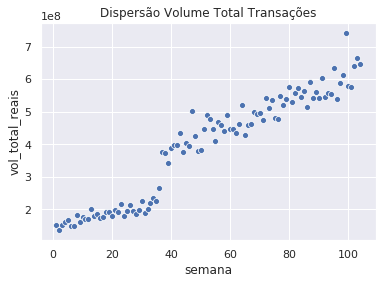

In [262]:
sns.scatterplot(x='semana',y= 'vol_total_reais', data = resultado_semanal)
plt.title("Dispersão Volume Total Transações");

Há uma relação linear entre as variáveis. Cada semana que passa o meu volume total semanal (R$) aumenta.

Por isso podemos prever o volume total no início de julho/2019

In [255]:
#crio as variáveis para o modelo
npsemana_fit = np.array(resultado_semanal.semana)
npvoltotal_fit = np.array(resultado_semanal.vol_total_reais)

In [257]:
#importo sklearn e a lib de estatistica do pytthon
from sklearn import linear_model
reg = linear_model.LinearRegression()
import statsmodels.api as sm

In [258]:
#variáveis treinadoras
x = npsemana_fit.reshape(-1,1)  
y = npvoltotal_fit.reshape(-1,1)

In [259]:
#treino modelo
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

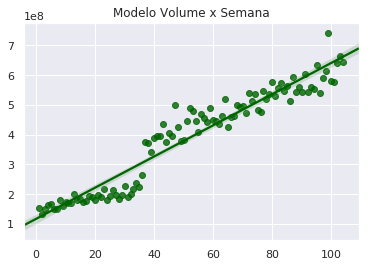

In [263]:
#criando um regplot
sns.regplot(x= npsemana, y=npvoltotal,color = 'darkgreen')
plt.title('Modelo Volume x Semana');

In [245]:
#checando a semana de interesse
x_test = np.array([130,131,132]) #crio o teste com três semanas, 1 antes e 1 depois da 1semana de julho
x_test = x_test.reshape(-1,1)

In [247]:
#checando a variável teste
x_test

array([[130],
       [131],
       [132]])

In [249]:
#checando o meu interceptor
reg.intercept_

array([1.16961864e+08])

In [250]:
#rodando a previsão
reg.predict(x_test)

array([[7.98793593e+08],
       [8.04038452e+08],
       [8.09283312e+08]])

In [261]:
reg.coef_

array([[5244859.45467241]])

Se não houver alteração no crescimento do volume de transações, há possibilidade de checar nos 8 milhões de volume de transações na semana. 